# 1) Generating a dataset of N two dimensional vectors from three classes model by normal distribution and given prior probabilities.


## 1)a) Equiprobable cases


(-9.561769968698556, 20.14102676204194, -3.2814101025632247, 11.84481563847426)

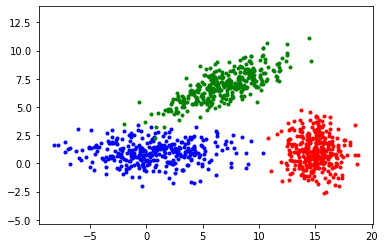

In [0]:
import numpy as np
import matplotlib.pyplot as plt
N=1000
c=3                     #no of classes

#mean vectors declaration

m1=np.array([1,1])
m2=np.array([7,7])
m3=np.array([15,1])
m=[m1,m2,m3]                 #concatenating matrices

#covariance matrix declaration

s1=np.array([[12 ,0],[0, 1]])
s2=np.array([[8 ,3],[3, 2]])
s3=np.array([[2 ,0],[0, 2]])
s=[s1,s2,s3]  #concatenatig covarinace matrices

color=['b.','g.','r.']    #color

p1=1/3
p2=1/3
p3=1/3
# prior probabilities multiplied by prior probabilities

p=[p1,p2,p3]
X=[]
Y=[]
np.random.seed(0)  #initializing seed
for i in range(c):
  x,y = np.random.multivariate_normal(m[i], s[i], int(np.fix(p[i]*N))).T    #generating samples from multivariate gaussian distribution 
  X.append(x)
  Y.append(y)
  
for i in range(3):
  plt.plot(X[i], Y[i], color[i])
plt.axis('equal')

## 1)b) Not  equiprobable classes

(-9.557527540514647, 20.051935770179877, -2.708064830016909, 11.8542142247567)

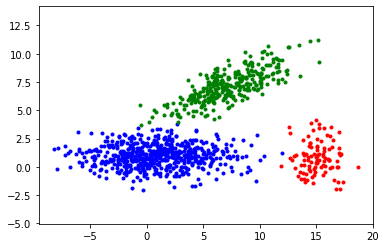

In [0]:
import numpy as np
import matplotlib.pyplot as plt
N=1000
c=3                     #no of classes

#mean vectors declaration

m1=np.array([1,1])
m2=np.array([7,7])
m3=np.array([15,1])
m=[m1,m2,m3]                 #concatenating matrices

#covariance matrix declaration

s1=np.array([[12 ,0],[0, 1]])
s2=np.array([[8 ,3],[3, 2]])
s3=np.array([[2 ,0],[0, 2]])
s=[s1,s2,s3]  #concatenatig covarinace matrices

color=['b.','g.','r.']    #color

p1=0.6
p2=0.3
p3=0.1
# prior probabilities multiplied by prior probabilities

p=[p1,p2,p3]
X=[]
Y=[]
np.random.seed(0)  #initializing seed
for i in range(c):
  x,y = np.random.multivariate_normal(m[i], s[i], int(np.fix(p[i]*N))).T    #generating samples from multivariate gaussian distribution 
  X.append(x)
  Y.append(y)
  
for i in range(3):
  plt.plot(X[i], Y[i], color[i])
plt.axis('equal')

# 2)Compute the classification error for the Bayesian, the Euclidean and the Mahalanobis classifiers on X1.

## Eucleadian classifier function 

In [0]:
def euclidean_classifier(m,X,Y):
  m=np.array(m)
  X=np.array(X)
  Y=np.array(Y)
  l,N=X.shape
  c,l=m.shape
  N=c*N
  X=X.reshape(N,1)
  Y=Y.reshape(N,1)
  h=[]
  min=[]
  for i in range(N):
    for j in range(c):
      k=math.sqrt((X[i]-m[j][0])**2+ (Y[i]-m[j][1])**2)
      h.append(k)
    h=np.array(h)
    result = np.where(h == np.amin(h))
    min.append(result)
    h=[]
  min=np.array(min) 
  return min
 

## Mahalanobis classifier

In [0]:
from scipy.spatial import distance
def mahalanobis_classifier(m,X,Y,S):
  m=np.array(m)
  X=np.array(X)
  Y=np.array(Y)
  S=np.array(S)
  l,N=X.shape
  c,l=m.shape
  N=c*N
  X=X.reshape(N,1)
  Y=Y.reshape(N,1)
  h=[]
  min=[]
  for i in range(N):
    q=[X[i],Y[i]]
    for j in range(c):
      k=distance.mahalanobis(q,m[j],S[j])
      h.append(k)
    h=np.array(h)  
    result = np.where(h == np.amin(h))
    min.append(result)
    h=[]
  min=np.array(min) 
  return min

## Bayesian Classifier

In [0]:
from scipy.spatial import distance
def bayesian_classifier(m,X,Y,S,P):
  m=np.array(m)
  X=np.array(X)
  Y=np.array(Y)
  S=np.array(S)
  P=np.array(P)
  l,N=X.shape
  c,l=m.shape
  l,dim=S[0].shape
  N=c*N
  X=X.reshape(N,1)
  Y=Y.reshape(N,1)
  h=[]
  max=[]
  for i in range(N):
    q=[X[i],Y[i]]
    for j in range(c):
      k=distance.mahalanobis(q,m[j],S[j])**2
      k=np.exp(k*(-0.5))
      pi=math.pi
      det=np.linalg.det(S[j])
      f=(2*pi)**dim
      d=math.sqrt(f*det)
      res=P[j]*(k/d)
      h.append(res)
    h=np.array(h)
    result = np.where(h == np.amax(h))
    max.append(result)
    h=[]
  max=np.array(max) 
  return max

## Main

The Eucledian miss classification rate:0.017
The Mahalanobis miss classification rate:0.017
The Bayesian miss classification rate:0.017


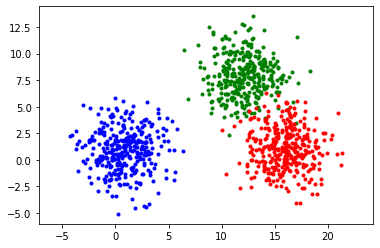

In [0]:
import numpy as np
import math
import matplotlib.pyplot as plt
N=1000
c=3  #no of classes
p1=1/3
p2=1/3
p3=1/3
prob=[p1,p2,p3]
m1=np.array([1,1])
m1=m1.T
m2=np.array([12,8])
m3=np.array([16,1])
m2=m2.T
m3=m3.T
m=[m1,m2,m3]
np.random.seed(0)
s=s1=s2=s3=4*np.identity(2,dtype=int)
s=[s1,s2,s3]
col=['b.','g.','r.']
p1=np.fix(p1*N)
p2=np.fix(p2*N)
p3=np.fix(p3*N)
p=p1+p2+p3
p=int(p)                #totalnumberofdatapoints

plt.figure()
X=[]
Y=[]
y_ref=[]
for i in range(c):
  x,y = np.random.multivariate_normal(m[i], s[i], int(p1)).T
  X.append(x)
  Y.append(y)
  y_ref.append(i*np.ones(int(p1))) 

for i in range(3):
  plt.plot(X[i], Y[i], col[i])
plt.axis('equal')


y_ref=np.array(y_ref)  
y_ref=y_ref.reshape(p,1,1)


#eucledian classifier
y_eucledian=euclidean_classifier(m,X,Y)
temp=y_ref-y_eucledian
for i in range(p-1):
  if temp[i]!=0:
    temp[i]=1
eucledian_miss= np.sum(temp)/N    
print("The Eucledian miss classification rate:"+str(eucledian_miss))


#mahalanobis classifier
y_maha=mahalanobis_classifier(m,X,Y,s)
temp=y_ref-y_maha
for i in range(p-1):
  if temp[i]!=0:
    temp[i]=1
Mahalanobis_miss= np.sum(temp)/N    
print("The Mahalanobis miss classification rate:"+str(Mahalanobis_miss))


# Bayesian classifier
y_bayesian=bayesian_classifier(m,X,Y,s,prob)
temp=y_ref-y_bayesian
for i in range(p-1):
  if temp[i]!=0:
    temp[i]=1
bayesian_miss= np.sum(temp)/N    
print("The Bayesian miss classification rate:"+str(bayesian_miss))
